In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
    
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mars-landmark-detection/sample_submission.csv
/kaggle/input/mars-landmark-detection/train.csv
/kaggle/input/mars-landmark-detection/test.csv
/kaggle/input/mars-landmark-detection/test/1269.jpg
/kaggle/input/mars-landmark-detection/test/623.jpg
/kaggle/input/mars-landmark-detection/test/2193.jpg
/kaggle/input/mars-landmark-detection/test/2008.jpg
/kaggle/input/mars-landmark-detection/test/2081.jpg
/kaggle/input/mars-landmark-detection/test/764.jpg
/kaggle/input/mars-landmark-detection/test/1700.jpg
/kaggle/input/mars-landmark-detection/test/1786.jpg
/kaggle/input/mars-landmark-detection/test/1075.jpg
/kaggle/input/mars-landmark-detection/test/771.jpg
/kaggle/input/mars-landmark-detection/test/208.jpg
/kaggle/input/mars-landmark-detection/test/2628.jpg
/kaggle/input/mars-landmark-detection/test/820.jpg
/kaggle/input/mars-landmark-detection/test/1789.jpg
/kaggle/input/mars-landmark-detection/test/473.jpg
/kaggle/input/mars-landmark-detection/test/1792.jpg
/kaggle/input/mars-

Load in more dependencies

In [2]:
from PIL import Image
import tensorflow as tf

2024-06-21 18:01:24.259439: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 18:01:24.259499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 18:01:24.260961: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Load in data and import numpy representations into the training and testing dataframes**

In [3]:
train_df = pd.read_csv("/kaggle/input/mars-landmark-detection/train.csv")
test_df = pd.read_csv("/kaggle/input/mars-landmark-detection/train.csv")

In [4]:
train_df.head(5)

,FileName,Class
0,1.jpg,0
1,2.jpg,0
2,3.jpg,0
3,4.jpg,0
4,5.jpg,0


In [5]:
train_image_directory = '/kaggle/input/mars-landmark-detection/train'
test_image_directory = '/kaggle/input/mars-landmark-detection/test'

train_df['np_img'] = None
test_df['np_img'] = None


def aggregate(image_directory):
    image_arrays = []
    file_names = []
    for filename in os.listdir(image_directory):
        file_path = os.path.join(image_directory, filename)
        if os.path.isfile(file_path) and filename.lower().endswith('.jpg'):
            print(f'Processing file: {file_path}')
            # Open the image
            with Image.open(file_path) as img:
                resized_img = img.resize((224, 224))
                # Convert the image to a NumPy array
                img_array = np.array(resized_img)
                # Append the image array and file name to the lists
                image_arrays.append(img_array)
                file_names.append(filename)
    image_dict = {file_names[i]: image_arrays[i] for i in range(len(file_names))}
    return image_dict

In [6]:
train_df.head(1)

,FileName,Class,np_img
0,1.jpg,0,None


Creating dictionary of image file names and their corresponding numpy arrays

In [7]:
train_image_dict = aggregate(train_image_directory)
test_image_dict = aggregate(test_image_directory)

Processing file: /kaggle/input/mars-landmark-detection/train/7981.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/6234.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/1269.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/3863.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/6241.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/623.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/2193.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/3750.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/2008.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/5982.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/7737.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/2081.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/6588.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/7966.jpg
Processing file: /kag

In [8]:
train_image_dict['7981.jpg']

array([[106, 106, 105, ..., 125, 125, 124],
       [106, 106, 106, ..., 126, 125, 125],
       [106, 106, 106, ..., 127, 127, 126],
       ...,
       [131, 130, 130, ..., 111, 112, 112],
       [131, 131, 130, ..., 111, 112, 112],
       [131, 131, 130, ..., 111, 112, 112]], dtype=uint8)

In [9]:
for i, row in train_df.iterrows():
    filename = row['FileName']
    if filename in train_image_dict:
        train_df.at[i, 'np_img'] = train_image_dict[filename]
for j, row in test_df.iterrows():
    filename = row['FileName']
    if filename in test_image_dict:
        test_df.at[j, 'np_img'] = test_image_dict[filename]

In [10]:
test_df['np_img'].iloc[2692]

array([[219, 222, 222, ..., 184, 190, 195],
       [222, 222, 220, ..., 190, 193, 195],
       [220, 221, 221, ..., 193, 195, 195],
       ...,
       [228, 227, 226, ..., 226, 229, 228],
       [228, 227, 226, ..., 227, 229, 229],
       [228, 227, 226, ..., 227, 230, 229]], dtype=uint8)

In [11]:
train_df.head(3).iloc[0]['np_img'].shape

(224, 224)

In [12]:
count_1 = (train_df['Class'] == 0).sum()
count_2 = (train_df['Class'] == 1).sum()
count_3 = (train_df['Class'] == 2).sum()
count_4 = (train_df['Class'] == 3).sum()
count_5 = (train_df['Class'] == 4).sum()
count_6 = (train_df['Class'] == 5).sum()
count_7 = (train_df['Class'] == 6).sum()
count_8 = (train_df['Class'] == 7).sum()
print(count_1)
print(count_2)
print(count_3)
print(count_4)
print(count_5)
print(count_6)
print(count_7)
print(count_8)

4829
1405
285
443
789
68
295
87


Extreme Class Imbalance especially for class '0'. Considering data augmentation=rotation, texture differintiation, light conversion.

# **PreProcessing**

Augment the lower represented classes

# *Structure*

* class(0) = slice in 4th randomly 
* class(1) = 0 augmentations
* class(2) = 2 augmentations
* class(3) = 1 augmentation
* class(4) = 1 augmentation
* class(5) = 4 augmentations if possible 3 works as well
* class(6) = 2 augmentations
* class(7) = 4 augmentations if possible 3 works as well

* ^^^Trying to get the number of representation of each class in the 1000-1500 sample range

In [13]:
class_0 = train_df.loc[train_df['Class'] == 0]
class_1 = train_df.loc[train_df['Class'] == 1]
class_2 = train_df.loc[train_df['Class'] == 2]
class_3 = train_df.loc[train_df['Class'] == 3]
class_4 = train_df.loc[train_df['Class'] == 4]
class_5 = train_df.loc[train_df['Class'] == 5]
class_6 = train_df.loc[train_df['Class'] == 6]
class_7 = train_df.loc[train_df['Class'] == 7]

In [14]:
class_0.sample(frac=0.25) # Randomly sample 1/4th of the class_0 representation

,FileName,Class,np_img
6791,6792.jpg,0,"[[80, 80, 80, 81, 81, 80, 78, 76, 76, 77, 78, ..."
23,24.jpg,0,"[[137, 134, 131, 130, 130, 128, 121, 112, 99, ..."
5928,5929.jpg,0,"[[153, 150, 145, 142, 142, 144, 145, 144, 143,..."
577,578.jpg,0,"[[162, 162, 162, 162, 162, 162, 162, 162, 161,..."
1538,1539.jpg,0,"[[188, 185, 182, 181, 184, 190, 194, 197, 195,..."
...,...,...,...
3299,3300.jpg,0,"[[116, 115, 115, 115, 113, 116, 124, 128, 130,..."
5912,5913.jpg,0,"[[244, 247, 250, 251, 250, 245, 237, 231, 227,..."
1295,1296.jpg,0,"[[114, 113, 106, 114, 128, 134, 132, 125, 125,..."
7925,7926.jpg,0,"[[60, 68, 72, 79, 86, 91, 102, 96, 91, 101, 10..."


In [15]:
# Lists to collect new rows
rot_90_rows = []
rot_180_rows = []

for i in range(len(class_2)):
    new_file_1 = "1rot_" + class_2.iloc[i]['FileName']
    new_file_2 = "2rot_" + class_2.iloc[i]['FileName']
    array = class_2.iloc[i]['np_img']
    
    if array.ndim == 2:
        array_90 = np.rot90(m=array, k=1).flatten()
        array_180 = np.rot90(m=array, k=2).flatten()
        row_90 = {"FileName": new_file_1, "Class": 2, "np_img": array_90}
        row_180 = {"FileName": new_file_2, "Class": 2, "np_img": array_180}
        rot_90_rows.append(row_90)
        rot_180_rows.append(row_180)
    else:
        print(f"Skipping row {i} because np_img is not 2D")

# Convert lists to DataFrames
rot_90_df = pd.DataFrame(rot_90_rows)
rot_180_df = pd.DataFrame(rot_180_rows)

# Concatenate the new DataFrames with the original
class_2 = pd.concat([class_2, rot_90_df, rot_180_df], ignore_index=True)

print(class_2)

          FileName  Class                                             np_img
0         1072.jpg      2  [[75, 75, 74, 73, 72, 71, 71, 70, 69, 69, 69, ...
1         1073.jpg      2  [[65, 66, 66, 65, 66, 69, 70, 68, 67, 64, 62, ...
2         1074.jpg      2  [[69, 76, 85, 89, 86, 83, 80, 76, 78, 84, 87, ...
3         1077.jpg      2  [[50, 49, 47, 48, 50, 47, 40, 35, 31, 32, 34, ...
4         1078.jpg      2  [[51, 52, 48, 45, 44, 39, 35, 37, 45, 46, 45, ...
..             ...    ...                                                ...
850  2rot_7049.jpg      2  [3, 4, 5, 5, 5, 4, 5, 5, 4, 5, 6, 6, 6, 6, 6, ...
851  2rot_7050.jpg      2  [62, 60, 63, 64, 65, 63, 60, 58, 63, 60, 61, 6...
852  2rot_7051.jpg      2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
853  2rot_7052.jpg      2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
854  2rot_7053.jpg      2  [26, 28, 32, 33, 31, 31, 32, 32, 31, 32, 34, 3...

[855 rows x 3 columns]


In [16]:
# Lists to collect new rows
rot_90_rows = []

for i in range(len(class_3)):
    new_file_1 = "1rot_" + class_3.iloc[i]['FileName']
    array = class_3.iloc[i]['np_img']
    
    if array.ndim == 2:
        array_90 = np.rot90(m=array, k=1).flatten()
        row_90 = {"FileName": new_file_1, "Class": 3, "np_img": array_90}
        rot_90_rows.append(row_90)
    else:
        print(f"Skipping row {i} because np_img is not 2D")

# Convert lists to DataFrames
rot_90_df = pd.DataFrame(rot_90_rows)

# Concatenate the new DataFrames with the original
class_3 = pd.concat([class_3, rot_90_df], ignore_index=True)

print(class_3)

          FileName  Class                                             np_img
0          505.jpg      3  [[70, 68, 67, 67, 67, 67, 66, 65, 63, 65, 64, ...
1          506.jpg      3  [[70, 67, 68, 70, 68, 69, 70, 69, 67, 68, 68, ...
2          507.jpg      3  [[15, 14, 10, 9, 10, 10, 9, 9, 11, 11, 11, 11,...
3          508.jpg      3  [[91, 94, 106, 90, 54, 37, 27, 18, 15, 13, 11,...
4          509.jpg      3  [[30, 28, 30, 32, 30, 32, 35, 34, 36, 38, 36, ...
..             ...    ...                                                ...
881  1rot_4093.jpg      3  [77, 77, 77, 76, 76, 76, 77, 77, 77, 77, 77, 7...
882  1rot_7409.jpg      3  [218, 216, 213, 212, 212, 211, 211, 212, 213, ...
883  1rot_7410.jpg      3  [156, 155, 155, 156, 156, 153, 152, 154, 155, ...
884  1rot_7411.jpg      3  [227, 220, 223, 220, 226, 221, 202, 208, 223, ...
885  1rot_7412.jpg      3  [155, 156, 157, 158, 158, 158, 156, 155, 155, ...

[886 rows x 3 columns]


In [17]:
def augment(class_num, class_cl, dim):
    # Lists to collect new rows
    rot_90_rows = []
    rot_180_rows = []
    rot_270_rows = []

    for i in range(len(class_num)):
        new_file_1 = "1rot_" + class_num.iloc[i]['FileName']
        new_file_2 = "2rot_" + class_num.iloc[i]['FileName']
        new_file_3 = "3rot_" + class_num.iloc[i]['FileName']

        array = class_num.iloc[i]['np_img']

        if array.ndim == 2:
            array_90 = np.rot90(m=array, k=1).flatten()
            array_180 = np.rot90(m=array, k=2).flatten()
            array_270 = np.rot90(m=array, k=3).flatten()
            row_90 = {"FileName": new_file_1, "Class": class_cl, "np_img": array_90}
            row_180 = {"FileName": new_file_2, "Class": class_cl, "np_img": array_180}
            row_270 = {"FileName": new_file_3, "Class": class_cl, "np_img": array_270}

            rot_90_rows.append(row_90)
            rot_180_rows.append(row_180)
            rot_270_rows.append(row_270)

        else:
            print(f"Skipping row {i} because np_img is not 2D")

    # Convert lists to DataFrames
    rot_90_df = pd.DataFrame(rot_90_rows)
    rot_180_df = pd.DataFrame(rot_180_rows)
    rot_270_df = pd.DataFrame(rot_270_rows)

    # Concatenate the new DataFrames with the original
    if dim == 1:
        class_num = pd.concat([class_num, rot_90_df], ignore_index=True)
    if dim == 2:
        class_num = pd.concat([class_num, rot_90_df, rot_180_df], ignore_index=True)
    if dim == 3:
        class_num = pd.concat([class_num, rot_90_df, rot_180_df, rot_270_df], ignore_index=True)

    return class_num

class_5 = augment(class_5, 5, 3)
class_6 = augment(class_6, 6, 2)
class_7 = augment(class_7, 7, 3)

In [18]:
print(len(class_4))
print(len(class_5))
print(len(class_6))
print(len(class_7))

789
272
885
348


In [19]:
train_df_new = pd.concat([class_0, class_1, class_2, class_3, class_4, class_5, class_6, class_7], ignore_index=True, axis=0)

In [20]:
train_df_new['np_img']

0        [[80, 78, 66, 70, 82, 73, 72, 88, 99, 101, 97,...
1        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2        [[187, 189, 189, 188, 186, 187, 189, 191, 190,...
3        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4        [[169, 170, 170, 169, 169, 171, 172, 171, 172,...
                               ...                        
10264    [78, 80, 81, 88, 94, 90, 81, 81, 90, 95, 95, 8...
10265    [137, 136, 137, 139, 140, 138, 129, 125, 123, ...
10266    [148, 152, 156, 161, 156, 149, 152, 165, 169, ...
10267    [148, 143, 136, 128, 121, 117, 122, 131, 130, ...
10268    [148, 148, 147, 146, 138, 130, 128, 131, 134, ...
Name: np_img, Length: 10269, dtype: object

In [21]:
print(train_df_new['np_img'].apply(lambda x: x.shape))
print(train_df_new['np_img'].apply(lambda x: x.size))

0        (224, 224)
1        (224, 224)
2        (224, 224)
3        (224, 224)
4        (224, 224)
            ...    
10264      (50176,)
10265      (50176,)
10266      (50176,)
10267      (50176,)
10268      (50176,)
Name: np_img, Length: 10269, dtype: object
0        50176
1        50176
2        50176
3        50176
4        50176
         ...  
10264    50176
10265    50176
10266    50176
10267    50176
10268    50176
Name: np_img, Length: 10269, dtype: int64


In [22]:
train_df_new['np_img'] = train_df_new['np_img'].apply(lambda x: x.reshape((224, 224)) if x.size == 50176 else x)

In [58]:
test_df_new['np_img'] = test_df['np_img'].apply(lambda x: x.reshape((224, 224)) if x.size == 50176 else x)

AttributeError: 'NoneType' object has no attribute 'size'

In [73]:
test_df = test_df.iloc[0:2694]

In [60]:
test_df.loc[test_df['np_img'] == None]

,FileName,Class,np_img


In [23]:
features = np.array((train_df_new['np_img']/255.0).tolist())
labels = np.array(train_df_new['Class'].tolist())
features = features.astype('float32')
labels = labels.astype('int32')

In [76]:
test_features = np.array((test_df['np_img']/255.0).tolist())
test_labels = np.array(test_df['Class'].tolist())
test_features = test_features.astype('float32')
test_labels = test_labels.astype('int32')

All the data is imported into the pandas training and testing dataframe

# **Model Creation without Latent Vectors**

In [25]:
train_df_new['np_img'].iloc[2000].shape

(224, 224)

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(224,224,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='softmax'))
#model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     5,537,824 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,593,568 (21.34 MB)

 Trainable params: 5,593,568 (21.34 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])
#history = model.fit(features, labels, epochs=10, batch_size=64)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
#y_pred = model.predict(test_features)
#print(len(y_pred))
#print(len(test_labels))
# Assuming your test dataset has a `labels` attribute
#print(y_pred[0])
#print(test_labels[0])
# Calculate accuracy
#accuracy = accuracy_score(test_labels, y_pred)

# **PROBLEMS!**

The above model takes approximately 2 seconds per training example ==> way too slow for model iteration

Clearly the above code is computation heavy and just takes too long to iterate over multiple models. This can lead to great frustration as the model may hit a local minimum and the learning needs to be redone. A solution is to take a dimensionally smaller represenation of the images that are provided. This can lead to faster computation as a smaller number of inputs are required to be considered.

# Solution = Autencoders

Autencoders have a knack for creating extremly small representations, proportionally, to the original image. Because not all portions of a an image matter like the backround to a cat when we are only trying to detect cats. It makes no sense to consider any "noise" that doesn't actually help us detect a cat. Because of this we can use autencoders to "feature-engineer" the most relevant and important characteristic to certain classes of images. This could be things like smooth lines with no jagged endings, or even simply the intersection angle of certain boundary lines.

# **Creating Autencoder**

In [30]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Reshape, Dropout, BatchNormalization, Input
from tensorflow.keras import Model
from tensorflow.keras import layers, losses


In [31]:
features.shape

(10269, 224, 224)

In [32]:
features.dtype

dtype('float32')

In [33]:
features_new = np.array([arr.flatten() for arr in features])
features_new.shape

(10269, 50176)

In [34]:
features.shape

(10269, 224, 224)

In [35]:
encoded_dim = 256

# **Fully Connected AutoEncoder**

In [36]:
# ENCODER
input_img = Input(shape=(224*224,))
encoded = layers.Dense(1024, activation='relu')(input_img)
encoded = layers.Dense(724, activation='relu')(encoded)
encoded = layers.Dense(648, activation='relu')(encoded)
encoded = layers.Dense(648, activation='relu')(encoded)


#LATENT VECTOR
encoded = layers.Dense(512, activation='relu')(encoded)


#DECODER
decoded = layers.Dense(648, activation='relu')(encoded)
decoded = layers.Dense(648, activation='relu')(decoded)
decoded = layers.Dense(728, activation='relu')(decoded)
decoded = layers.Dense(1024, activation='relu')(decoded)
decoded = layers.Dense(224*224, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(features_new, features_new,
                epochs=25,
                batch_size=128,
                shuffle=True)

Epoch 1/25
 3/81 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0383

I0000 00:00:1718992938.492594    1032 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718992938.507150    1032 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - loss: 0.0373
Epoch 2/25
 1/81 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.0292

W0000 00:00:1718992946.944558    1032 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0345
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0282
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0131
Epoch 5/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0111
Epoch 6/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0106
Epoch 7/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0101
Epoch 8/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0096
Epoch 9/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0095
Epoch 10/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0093
Epoch 11/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0091
Epoch 12/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0093
Epoch 13/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0091
Epoch 14/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0089
Epoch 15/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0091
Epoch 16/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0088
Epoch 17/25
81

 48/321 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

W0000 00:00:1718993056.484792    1034 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


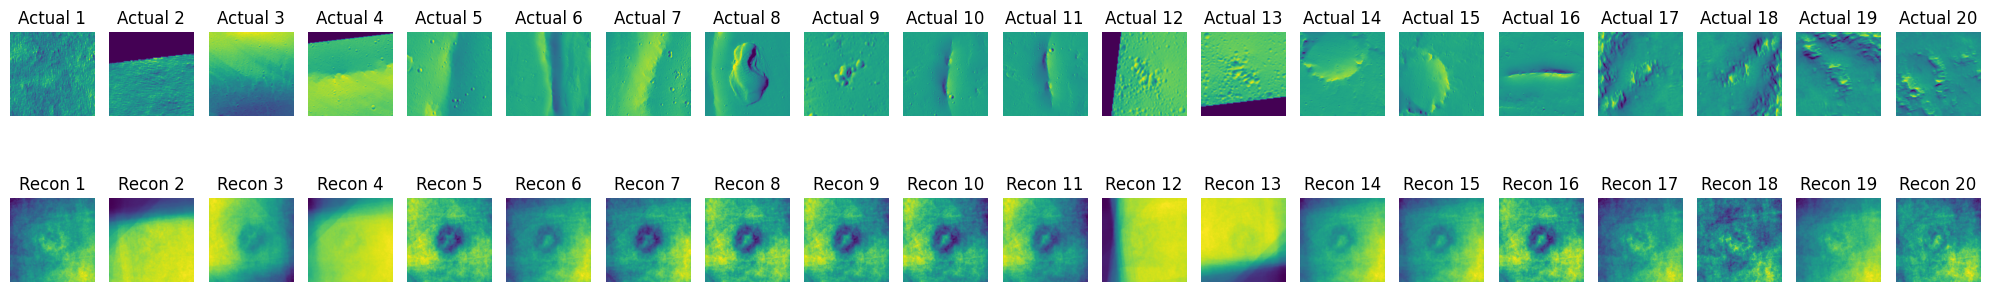

In [37]:
y_pred = autoencoder.predict(features_new)
y_pred = np.array([arr.reshape((224,224)) for arr in y_pred])

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 20, figsize=(20, 4))

for i in range(20):
    axes[0, i].imshow(features_new[i].reshape((224,224)))
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Actual {i+1}')

# Plot reconstructed images in the second row
for i in range(20):
    axes[1, i].imshow(y_pred[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Recon {i+1}')

# Show the plot
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


Clearly not good reconstructions because the autoencoder can't capture image relations, so we are going to try and create a CNN layered autoencoder that can capture more relevant pieces of information from the images. Additionally, I will now try to augment the data to see what might change.

# **CNN Based Autoencoder**

In [38]:
features[1:2]

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.39215687, 0.41568628, 0.47058824, ..., 0.44705883,
         0.45490196, 0.4509804 ],
        [0.48235294, 0.5058824 , 0.5568628 , ..., 0.42745098,
         0.4392157 , 0.4392157 ],
        [0.5176471 , 0.5411765 , 0.5921569 , ..., 0.4117647 ,
         0.42745098, 0.43529412]]], dtype=float32)

In [39]:
features.shape

(10269, 224, 224)

In [40]:
new = features.reshape(-1,224,224,1)
new.shape

(10269, 224, 224, 1)

In [77]:
new_test = test_features.reshape(-1,224,224,1)
new_test.shape

(2694, 224, 224, 1)

In [41]:
#Input
input_img = Input(shape=(224,224,1), name='input_img')
#ENCODER
conv1 = Conv2D(32, (3,3), activation='relu', padding='same')(input_img) # 227 x 227 x 32
pool1 = MaxPooling2D(pool_size=(2,2), padding='same')(conv1) # 114 x 114 x 32
conv2 = Conv2D(64, (3,3), activation='relu', padding='same')(pool1) # 114 x 114 x 64
pool2 = MaxPooling2D(pool_size=(2,2), padding='same')(conv2) # 57 x 57 x 64
conv3 = Conv2D(128, (3,3), activation='relu', padding='same')(pool2) # 57 x 57 x 128

#encoded vector
pool3 = MaxPooling2D(pool_size=(2,2), padding='same')(conv3)
    
#DECODER
conv4 = Conv2D(128, (3,3), activation='relu', padding='same')(pool3) # 57 x 57 x 128
upsmple1 = UpSampling2D(size=(2,2))(conv4) # 114 x 114 x 128
conv5 = Conv2D(64, (3,3), activation='relu', padding='same')(upsmple1) # 114 x 114 x 64
upsmple2 = UpSampling2D(size=(2,2))(conv5) # 228 x 228 x 64
conv6 = Conv2D(1, (3,3), activation='sigmoid', padding='same')(upsmple2) # 228 x 228 x 1
decoded = UpSampling2D(size=(2,2))(conv6)

In [42]:
model = Model(inputs=input_img, outputs=decoded, name = 'CAE')
model.compile(loss="binary_crossentropy", optimizer='adadelta')

In [43]:
model.summary()

Model: "CAE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)          │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 112, 112, 1)    │           577 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 224, 224, 1)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,625 (1.20 MB)

 Trainable params: 314,625 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.fit(new, new, batch_size=64, epochs = 20)

Epoch 1/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - loss: 0.6166
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - loss: 0.6172
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - loss: 0.6169
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - loss: 0.6148
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - loss: 0.6169
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - loss: 0.6160
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - loss: 0.6161
Epoch 8/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - loss: 0.6168
Epoch 9/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - loss: 0.6174
Epoch 10/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - loss: 0.6161
Epoch 11/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - loss: 0.6163
Epoch 12/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - loss: 0.6160
Epoch 13/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - loss: 0.6174
Epoch 14/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - loss: 0.6156
Epoch 15/20
161

In [48]:
out_images = model.predict(new)

321/321 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


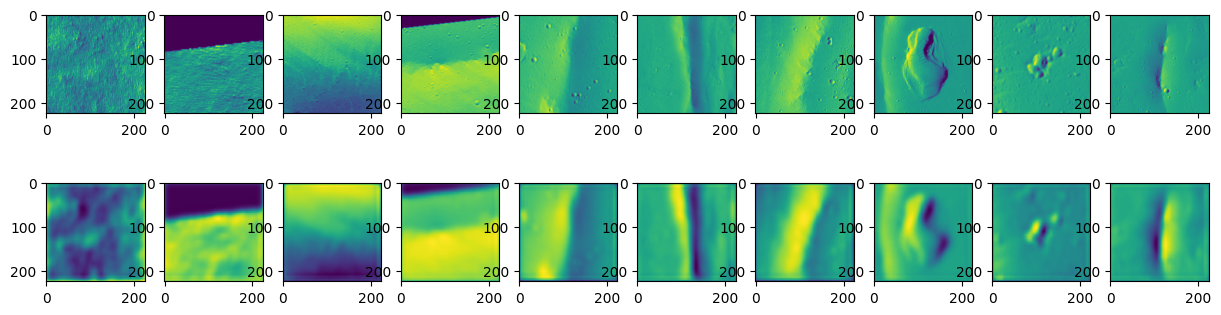

In [49]:
n = 10
plt.figure(figsize = (15,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(new[i].reshape(224,224))
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(out_images[i].reshape(224,224))
plt.show()

So fantastic results are shown above by creating a convolutional autoencoder now to check on test_set

85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


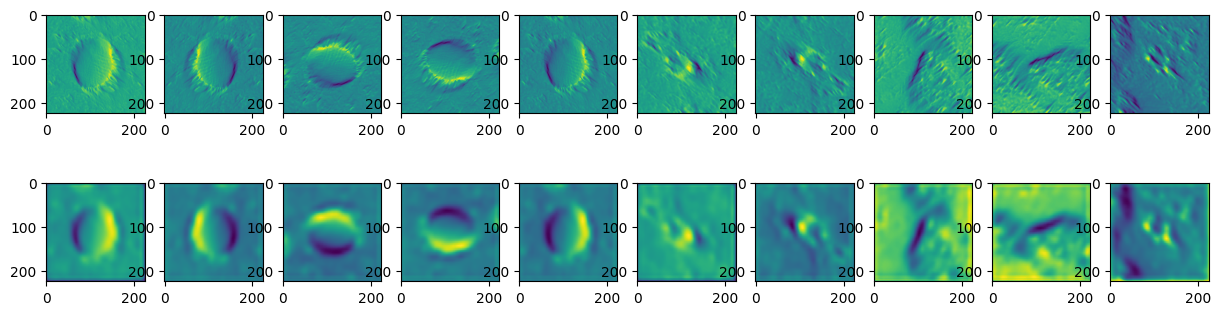

In [78]:
test_images = model.predict(new_test)
n = 10
plt.figure(figsize = (15,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(new_test[i].reshape(224,224))
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(test_images[i].reshape(224,224))
plt.show()

Very high accuracy, or at least enough to understand and classify the location.

# **Classification Deep NN**

We are going to test it on the variational autoencoder created by the Densely connected AE and the CNN based AE

# **CNN Based NN**

# Encode all the test data

In [82]:
# "Reference" and create seperate encode model
encoder = Model(inputs=input_img, outputs=pool3) # Reference above keras api functional model where pool3 was bottleneck layer
#get train data encoded?
encoded_data = encoder.predict(new)

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [92]:
len(test_df['Class'].unique())

7

In [112]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

#Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 128)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Add a Dense layer with ReLU activation for the hidden layer
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
# Add a Dense layer with softmax activation for the output layer
model.add(Dense(8 , activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the encoded data and the corresponding labels
model.fit(encoded_data, test_labels, epochs=120, batch_size=32, validation_split=0.2)

Epoch 1/120
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.3235 - loss: 1.7175 - val_accuracy: 0.3228 - val_loss: 1.6465
Epoch 2/120
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3610 - loss: 1.5830 - val_accuracy: 0.3469 - val_loss: 1.6515
Epoch 3/120
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3554 - loss: 1.5591 - val_accuracy: 0.3451 - val_loss: 1.7536
Epoch 4/120
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3637 - loss: 1.5343 - val_accuracy: 0.3599 - val_loss: 1.8915
Epoch 5/120
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3517 - loss: 1.5075 - val_accuracy: 0.3599 - val_loss: 1.7470
Epoch 6/120
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3670 - loss: 1.5103 - val_accuracy: 0.3618 - val_loss: 1.8201
Epoch 7/120
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3679 - loss: 1.4943 - val_accuracy: 0.3636 - val_loss: 1.7857
Epoch 8/120
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3707 - loss: 1.4884 - val_accuracy: 0.

# Encode the test data

In [113]:
encoded_testdata = encoder.predict(new_test)

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [114]:
encoded_testdata[1:2]

array([[[[0.        , 0.04534616, 0.04546971, ..., 0.07912151,
          0.06463465, 0.        ],
         [0.        , 0.05959031, 0.05338176, ..., 0.0604297 ,
          0.0447776 , 0.        ],
         [0.        , 0.05329437, 0.04694955, ..., 0.06403898,
          0.0418076 , 0.        ],
         ...,
         [0.        , 0.05329703, 0.05062948, ..., 0.0593063 ,
          0.04334519, 0.        ],
         [0.        , 0.05439371, 0.04751009, ..., 0.06135174,
          0.04227314, 0.        ],
         [0.        , 0.09175348, 0.11231866, ..., 0.05260437,
          0.13757811, 0.        ]],

        [[0.        , 0.02479428, 0.04765829, ..., 0.07361101,
          0.04476011, 0.        ],
         [0.        , 0.03636762, 0.04533766, ..., 0.04638973,
          0.0338925 , 0.        ],
         [0.        , 0.03181716, 0.04248409, ..., 0.04569153,
          0.02956973, 0.        ],
         ...,
         [0.        , 0.03386811, 0.04755122, ..., 0.04714757,
          0.03218903, 0. 

In [115]:
test_predictions = model.predict(encoded_testdata)
correct_predictions = np.argmax(test_predictions, axis=1) == test_labels
accuracy = np.mean(correct_predictions)
print(f"Accuracy: {accuracy}")

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Accuracy: 0.8426132145508537


Done